# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Banyak data, yang memuat berbagai informasi yang kita inginkan, yang tersedia di berbagai situs. Data tersebut dapat diambil dan dianalisis lebih lanjut sesuai dengan kebutuhan. Data tersebut diambil menggunakan salah satu library dalam Python yaitu BeautifulSoup.  

Untuk Capstone Project ini, data yang akan diambil yaitu kurs $ ke Rp untuk periode Bulan Juni 2023 s.d. Desember 2023. data yang diambil yaitu berupa tabel yang berisi kolom 'tanggal' dan 'kurs'. Setelah mendapatkan hasil webscrapping dari situs ini kemudian akan dilakukan proses data cleaning dan visualisasi.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [16]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [17]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [18]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [19]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. 

Dari laman kurs tersebut, dengan menggunakan `.find()`, ditemukan key dimana lokasi tabel yang akan di-scrapping yaitu di kode html `tbody`. 


In [20]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <td>
   <a class="w" href="/exchange-rate-history/usd-idr-2023-12-15">
    December 15, 2023
   </a>
   <a class="n" href="/exchange-rate-history/usd-idr-2023-12-15">
    2023-12-15
   </a>
  </td>
  <td>
   <span class="w">
    <span class="nowrap">
     <span class="currencySymbol">
      $
     </span>
     1 =
    </span>
    <span class="nowrap">
     <span class="currencySymbol">
      Rp
     </span>
     15,529
    </span>
   </span>
   <span class="n">
    <span class="n


Finding row length.

In [21]:
table_exc_rates = table.find_all('a', attrs= {'class':'w'} )
#table_exc_rates
row_length = len(table_exc_rates)
row_length

130

Do the scrapping process here (please change this markdown with your explanation)

In [22]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    #get tanggal 
   tanggal = table.find_all('a', attrs={'class':'n'})[i].text
    
    #get kurs
   kurs = table.find_all('span', attrs={'class':'w'})[i].text
       
   temp.append((tanggal, kurs))
    
temp 

[('2023-12-15', '$1 = Rp15,529'),
 ('2023-12-14', '$1 = Rp15,476'),
 ('2023-12-13', '$1 = Rp15,360'),
 ('2023-12-12', '$1 = Rp15,576'),
 ('2023-12-11', '$1 = Rp15,653'),
 ('2023-12-8', '$1 = Rp15,573'),
 ('2023-12-7', '$1 = Rp15,507'),
 ('2023-12-6', '$1 = Rp15,514'),
 ('2023-12-5', '$1 = Rp15,463'),
 ('2023-12-4', '$1 = Rp15,485'),
 ('2023-12-1', '$1 = Rp15,413'),
 ('2023-11-30', '$1 = Rp15,559'),
 ('2023-11-29', '$1 = Rp15,459'),
 ('2023-11-28', '$1 = Rp15,352'),
 ('2023-11-27', '$1 = Rp15,505'),
 ('2023-11-24', '$1 = Rp15,540'),
 ('2023-11-23', '$1 = Rp15,633'),
 ('2023-11-22', '$1 = Rp15,656'),
 ('2023-11-21', '$1 = Rp15,517'),
 ('2023-11-20', '$1 = Rp15,389'),
 ('2023-11-17', '$1 = Rp15,424'),
 ('2023-11-16', '$1 = Rp15,484'),
 ('2023-11-15', '$1 = Rp15,519'),
 ('2023-11-14', '$1 = Rp15,459'),
 ('2023-11-13', '$1 = Rp15,683'),
 ('2023-11-10', '$1 = Rp15,694'),
 ('2023-11-9', '$1 = Rp15,715'),
 ('2023-11-8', '$1 = Rp15,625'),
 ('2023-11-7', '$1 = Rp15,651'),
 ('2023-11-6', '$1 = Rp

In [23]:
temp = temp[::-1]
temp

[('2023-6-19', '$1 = Rp15,014'),
 ('2023-6-20', '$1 = Rp15,015'),
 ('2023-6-21', '$1 = Rp14,945'),
 ('2023-6-22', '$1 = Rp14,939'),
 ('2023-6-23', '$1 = Rp15,045'),
 ('2023-6-26', '$1 = Rp15,045'),
 ('2023-6-27', '$1 = Rp14,988'),
 ('2023-6-28', '$1 = Rp14,985'),
 ('2023-6-29', '$1 = Rp15,059'),
 ('2023-6-30', '$1 = Rp15,040'),
 ('2023-7-3', '$1 = Rp15,063'),
 ('2023-7-4', '$1 = Rp15,020'),
 ('2023-7-5', '$1 = Rp15,078'),
 ('2023-7-6', '$1 = Rp15,178'),
 ('2023-7-7', '$1 = Rp15,162'),
 ('2023-7-10', '$1 = Rp15,187'),
 ('2023-7-11', '$1 = Rp15,140'),
 ('2023-7-12', '$1 = Rp14,935'),
 ('2023-7-13', '$1 = Rp14,954'),
 ('2023-7-14', '$1 = Rp15,003'),
 ('2023-7-17', '$1 = Rp14,972'),
 ('2023-7-18', '$1 = Rp14,989'),
 ('2023-7-19', '$1 = Rp15,009'),
 ('2023-7-20', '$1 = Rp15,056'),
 ('2023-7-21', '$1 = Rp15,043'),
 ('2023-7-24', '$1 = Rp15,022'),
 ('2023-7-25', '$1 = Rp15,027'),
 ('2023-7-26', '$1 = Rp15,009'),
 ('2023-7-27', '$1 = Rp15,102'),
 ('2023-7-28', '$1 = Rp15,107'),
 ('2023-7-31', 

## Creating data frame & Data wrangling

Put the array into dataframe

In [24]:
import pandas as pd

inflation_rate = pd.DataFrame(temp, columns=('tanggal', 'kurs'))
inflation_rate.head()

,tanggal,kurs
0,2023-6-19,"$1 = Rp15,014"
1,2023-6-20,"$1 = Rp15,015"
2,2023-6-21,"$1 = Rp14,945"
3,2023-6-22,"$1 = Rp14,939"
4,2023-6-23,"$1 = Rp15,045"


Do the data cleaning here.

Untuk data cleaning ini, dilakukan beberapa hal yaitu sebagai berikut:
- Mengambil 6 karakter str paling kanan dari kolom `kurs` dengan menggunakan method `.str[]`.
- Menghilangkan karakter koma (`,`) dari kolom `kurs` dengan menggunakan method `.str.replace()`.
- Mengganti tipe data yaitu kolom `tanggal` menjadi datetime64[ns] dan kolom `kurs` menjadi `float`.
- Melakukan setting index pada tabel `inflation_rate` menggunakan eksisting kolom `tanggal`

In [25]:
inflation_rate['kurs'] = inflation_rate['kurs'].str[-6:]
inflation_rate['kurs'] = inflation_rate['kurs'].str.replace(',', '')
inflation_rate.head()


,tanggal,kurs
0,2023-6-19,15014
1,2023-6-20,15015
2,2023-6-21,14945
3,2023-6-22,14939
4,2023-6-23,15045


In [26]:
inflation_rate['tanggal'] = inflation_rate['tanggal'].astype('datetime64[ns]')
inflation_rate['kurs'] = inflation_rate['kurs'].astype('float64')
inflation_rate.dtypes

tanggal    datetime64[ns]
kurs              float64
dtype: object

In [27]:
inflation_rate = inflation_rate.set_index('tanggal')
inflation_rate.tail()

,kurs
tanggal,
2023-12-11,15653.0
2023-12-12,15576.0
2023-12-13,15360.0
2023-12-14,15476.0
2023-12-15,15529.0


### Data visualisation 

Data yang diambil dari webscrapping merupakan data time-series dimana data kurs $ ke Rp di-update setiap hari. oleh karena itu, visualisasi yang menggambarkan time-series ini yaitu diagram `line` dimana untuk fungsi dari `.plot()` secara default merupakan diagram line.

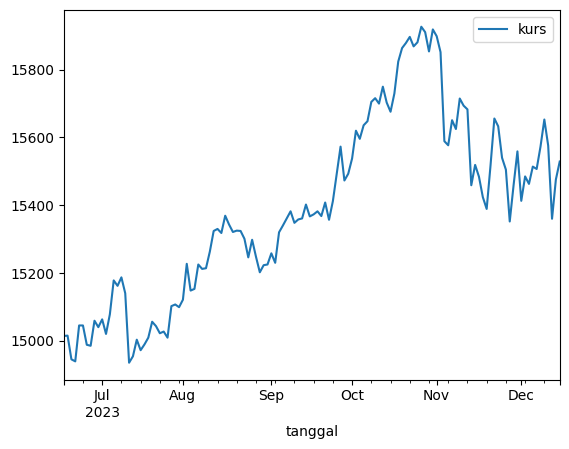

In [28]:
inflation_rate.plot();

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

Dari visualisasi grafik di atas, dapat di-highlight beberapa hal sebagai berikut:
- Kurs secara umum cenderung mengalamai kenaikan untuk periode Juli s.d. Desember 2023.
- Kurs pada awal bulan Juli 2023 merupakan kurs $ yang paling rendah. 
- Kurs pada awal bulan November 2023 merupakan kenaikan kurs $ yang paling tinggi. 
- Kurs pada bulan November 2023 ke Desember 2o23 mengalami penurunan

### KESIMPULAN

Dangan menggunakan library `BeautifulSoap`, kita dapat mengambil data kurs, yang berasal dari situs https://www.exchange-rates.org/history/IDR/USD/T, untuk periode dari Bulan Juli 2023 s.d. Desember 2023. Setelah data webscrapping ini menjadi dataframe, perlu dilakukan cleaning dan wrangling sehingga dapat dianalisis lebih lanjut menggunakan pandas. Kemudian dataframe ini kita lakukan visualiasasi menggunakan `plot` sehingga didapat grafik time-series perubahan kurs terhadap periode tertentu.

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.